In [ ]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/training_set',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test_set',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 15)




Found 852 images belonging to 2 classes.
Found 270 images belonging to 2 classes.
Epoch 1/15
27/27 [==============================] - 129s 5s/step - loss: 0.9230 - accuracy: 0.6808 - val_loss: 0.8192 - val_accuracy: 0.5185
Epoch 2/15
27/27 [==============================] - 41s 1s/step - loss: 0.6033 - accuracy: 0.7254 - val_loss: 0.8007 - val_accuracy: 0.5185
Epoch 3/15
27/27 [==============================] - 38s 1s/step - loss: 0.5811 - accuracy: 0.7289 - val_loss: 0.6725 - val_accuracy: 0.5593
Epoch 4/15
27/27 [==============================] - 36s 1s/step - loss: 0.5708 - accuracy: 0.7289 - val_loss: 0.8179 - val_accuracy: 0.5185
Epoch 5/15
27/27 [==============================] - 39s 1s/step - loss: 0.5389 - accuracy: 0.7453 - val_loss: 0.8101 - val_accuracy: 0.5481
Epoch 6/15
27/27 [==============================] - 38s 1s/step - loss: 0.5148 - accuracy: 0.7535 - val_loss: 0.6457 - val_accuracy: 0.6185
Epoch 7/15
27/27 [==============================] - 36s 1s/step - loss: 0.508

In [ ]:
cnn.evaluate(test_set)[1]


9/9 [==============================] - 4s 414ms/step - loss: 0.6101 - accuracy: 0.7185


0.7185184955596924

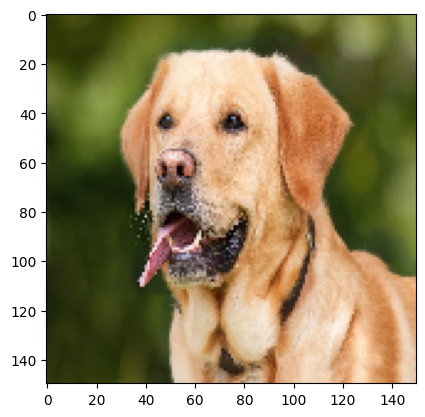

1/1 [==============================] - 0s 147ms/step
1.0
dog


In [ ]:
import numpy as np
from keras.preprocessing import image
from PIL import Image
path = r'/content/drive/MyDrive/dataset/single_prediction/cat_or_dog_1.jpg'

from matplotlib import pyplot as plt
img = plt.imread(path)

test_image = image.load_img(path, target_size = (150, 150))
plt.imshow(test_image)
plt.show()
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
print(result[0][0])
if result[0][0].any() == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)
img = Image.open(path)
img.show()

In [ ]:
from keras import models
layer_outputs = [layer.output for layer in cnn.layers[:4]]
activation_model = models.Model(inputs=cnn.input, outputs=layer_outputs)
activations = activation_model.predict(test_image)
first_layer_activation = activations[0]
last_layer_activation = activations[3]
print(first_layer_activation.shape)
print(last_layer_activation.shape)

1/1 [==============================] - 0s 360ms/step
(1, 148, 148, 32)
(1, 36, 36, 32)


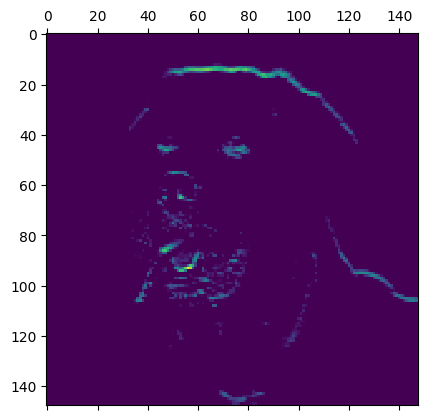

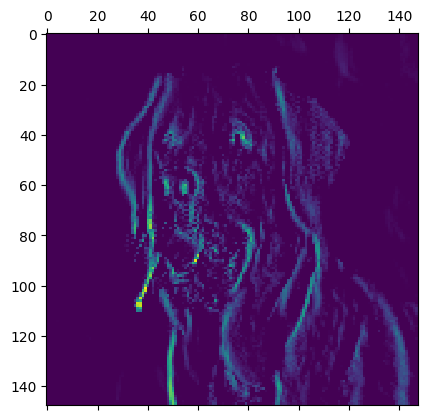

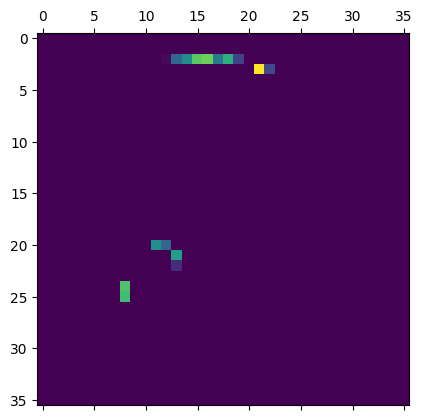

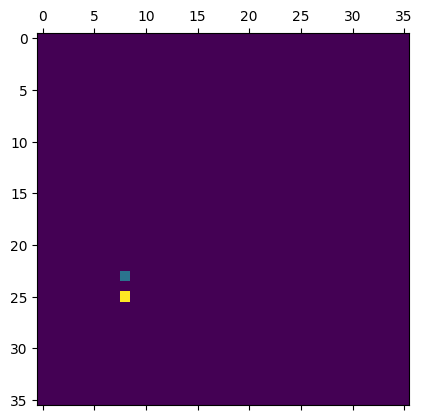

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 7],
cmap='viridis')
plt.matshow(last_layer_activation[0, :, :, 1], cmap='viridis')
plt.matshow(last_layer_activation[0, :, :, 7],
cmap='viridis')


количество слоев активации 4


<ipython-input-7-f6118adfd525>:18: RuntimeWarning: invalid value encountered in divide
  channel_image /=  channel_image.std()
<ipython-input-7-f6118adfd525>:21: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype("uint8")


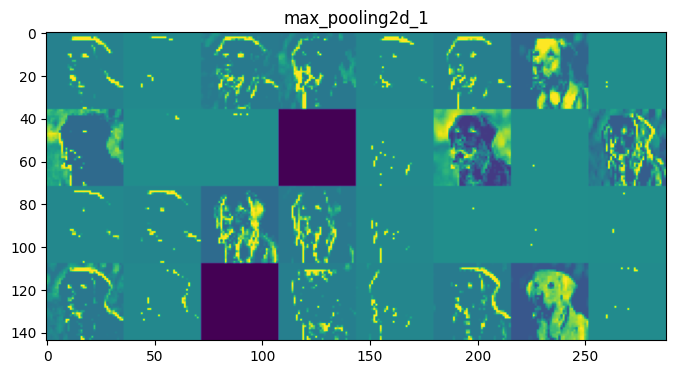

In [ ]:
import numpy as np
num_act_layers=sum(1 for layer in cnn.layers if hasattr(layer,'activation'))
print("количество слоев активации", num_act_layers)
layer_names = []
for layer in cnn.layers[:4]:
  layer_names.append(layer.name)
  images_per_row = 8
for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols,
  images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :,  col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /=  channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype("uint8")
      display_grid[col * size : (col + 1)
      * size,
      row * size : (row + 1) * size] = channel_image
      scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],
scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')



In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


cnn = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = cnn.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

#grads = K.gradients(loss, cnn.input)[0]

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
grads = K.gradients(loss, cnn.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)


In [ ]:
iterate = K.function([cnn.input], [loss, grads])
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [ ]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128
step = 1.
for i in range(40):
  loss_value, grads_value = iterate([input_img_data])
  input_img_data += grads_value * step


In [ ]:
def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  x += 0.5
  x = np.clip(x, 0, 1)
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [ ]:
def generate_pattern(layer_name, filter_index, size=150):
  layer_output = cnn.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])
  grads = K.gradients(loss, cnn.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
  iterate = K.function([cnn.input], [loss, grads])
  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
    img = input_img_data[0]
    result=deprocess_image(img)
    return result

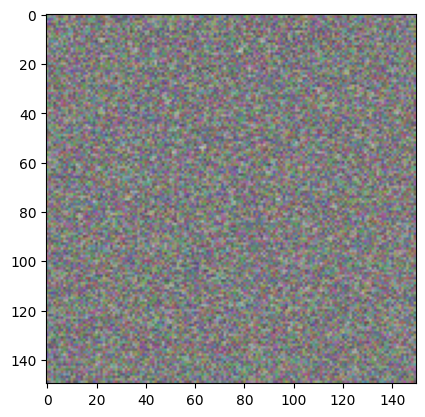

In [ ]:
img = plt.imread(path)
plt.imshow(generate_pattern('block3_conv1', 0))

In [ ]:
layer_name = 'block1_conv1'
size = 64
margin = 5
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))
for i in range(8):
  for j in range(8):
    filter_img = generate_pattern(layer_name, i + (j * 8),size=size)
    horizontal_start = i * size + i * margin
    horizontal_end = horizontal_start + size
    vertical_start = j * size + j * margin
    vertical_end = vertical_start + size
    results[horizontal_start: horizontal_end,
    vertical_start: vertical_end, :] = filter_img
    plt.figure(figsize=(10, 10))
    plt.imshow(results.astype('uint8'))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
import cv2
import glob
import h5py
import shutil
import imgaug as aug
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential, Model, load_model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from keras import backend as K
import tensorflow as tf

In [ ]:
for layer in cnn.layers[:4]:
  layer_names.append(layer.name.split("/")[0])
print(layer_names)

['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool']


In [ ]:
# Localization

from keras.models import load_model, Model

layer_index = -4

classifier = load_model('model.h5')
weights = classifier.layers[-1].get_weights()[0]
classifier = Model(inputs=classifier.input,outputs=(classifier.layers[layer_index].output,classifier.layers[-1].output))

if layer_index >= 0:
    layer_index += 1
width_factor = classifier.layers[layer_index].output_shape[1]
height_factor = classifier.layers[layer_index].output_shape[2]

# Load image
import numpy as np

import matplotlib.pyplot as plt
def visualize(img):
    conv_out, guess = classifier.predict(img)
    print(guess)
    conv_out = np.squeeze(conv_out)
    for i in range(len(conv_out[0][0])):
        plt.figure()
        plt.imshow(conv_out[:,:,i])


def get_heatmap(image):
    conv_out, pred = classifier.predict(image)
    conv_out = np.squeeze(conv_out)
    pred = np.argmax(pred)
    from scipy.ndimage import zoom
    mat_for_mult = zoom(conv_out, (64./width_factor, 64./height_factor, 1), order=1)
    weights = classifier.layers[-1].get_weights()[0][:,int(pred)]
    out = np.dot(mat_for_mult.reshape((64*64, 32)), weights).reshape((64, 64))
    return pred, out

def get_bounds(out, percentile=95):
    # Get bounding box of 95+ percentile pixels
    a = out.flatten()
    filtered = np.array([1 if x > np.percentile(a, percentile) else 0 for x in a]).reshape(64,64)
    left, up, down, right = 64, 64, 0, 0
    for x in range(64):
        for y in range(64):
            if filtered[y,x] == 1:
                left = min(left, x)
                right = max(right, x)
                up = min(up, y)
                down = max(down, y)
    return left, up, down, right

from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=1,
        class_mode='categorical')

def load_image(path):
    from PIL import Image
    img = Image.open(path)
    img = img.resize((64,64))
    arr = np.asarray(img)
    arr = arr/255.0
    return arr

def show_next(bounds=True, heatmap=True, show_image=True, image=[]):
    if len(image) == 0:
        img = test_set.next()[0]
    else:
        img = image
        img = np.expand_dims(img, axis=0)
    global out
    pred, out = get_heatmap(img)

    # Plot Heatmap
    fig, ax = plt.subplots()
    ax.imshow(img[0], alpha=(0.7 if heatmap else 1.))
    if heatmap:
        ax.imshow(out, cmap='jet', alpha=(0.3 if show_image else 1.))
    if bounds:
        left, up, down, right = get_bounds(out)
        import matplotlib.patches as patches
        rect = patches.Rectangle((left, up), (right-left), (down-up), linewidth=1,  edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    if pred == 0:
        ax.set_title('Cat')
    else:
        ax.set_title('Dog')
    plt.show()

<ipython-input-68-cdb84e002de4>:42: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  heat_map = ndimage.filters.gaussian_filter(x, sigma=16)


NameError: name 'heatmap' is not defined

In [ ]:
def show_random_sample(idx):
    """
    This function is used to select a random sample from the validation dataframe.
    It generates prediction for the same. It also stores the heatmap and the intermediate
    layers activation maps.

    Arguments:
        idx: random index to select a sample from validation data

    Returns:
        activations: activation values for intermediate layers
    """
    # select the sample and read the corresponding image and label
    sample_image = cv2.imread(path)
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    sample_image = cv2.resize(sample_image, (img_rows, img_cols))
    sample_label = valid_df.iloc[idx]["label"]

    # pre-process the image
    sample_image_processed = np.expand_dims(sample_image, axis=0)
    sample_image_processed = preprocess_input(sample_image_processed)

    # generate activation maps from the intermediate layers using the visualization model
    activations = cnn.predict(sample_image_processed)

    # get the label predicted by our original model
    pred_label = np.argmax(cnn.predict(sample_image_processed), axis=-1)[0]

    # choose any random activation map from the activation maps
    sample_activation = activations[0][0,:,:,32]

    # normalize the sample activation map
    sample_activation-=sample_activation.mean()
    sample_activation/=sample_activation.std()

    # convert pixel values between 0-255
    sample_activation *=255
    sample_activation = np.clip(sample_activation, 0, 255).astype(np.uint8)



    # get the heatmap for class activation map(CAM)
    heatmap = get_CAM(sample_image_processed, pred_label)
    heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
    heatmap = heatmap *255
    heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    super_imposed_image = heatmap * 0.5 + sample_image
    super_imposed_image = np.clip(super_imposed_image, 0,255).astype(np.uint8)

    f,ax = plt.subplots(2,2, figsize=(15,8))
    ax[0,0].imshow(sample_image)
    ax[0,0].set_title(f"True label: {sample_label} \n Predicted label: {pred_label}")
    ax[0,0].axis('off')

    ax[0,1].imshow(sample_activation)
    ax[0,1].set_title("Random feature map")
    ax[0,1].axis('off')

    ax[1,0].imshow(heatmap)
    ax[1,0].set_title("Class Activation Map")
    ax[1,0].axis('off')

    ax[1,1].imshow(super_imposed_image)
    ax[1,1].set_title("Activation map superimposed")
    ax[1,1].axis('off')
    plt.show()

    return activations

In [ ]:
activations= show_random_sample(0)


NameError: name 'valid_df' is not defined